In [5]:
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.io import fits
from astropy import wcs
from astropy.table import Table
import seaborn as sns

## Read tables

In [6]:
EGS_cat=Table.read('./data/dmu26_XID+MIPS_EGS_Legacy_cat.fits')

In [7]:
EGS_cat[0:10]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J141442.003+515539.339,213.67501162574598,51.9275942135701,25.766361,38.14536,14.193435,0.006743462,4.698811e-06,1.0017574,2000.0,0.886
HELP_J141433.793+515648.049,213.640805625746,51.946680213570104,33.748978,46.78966,22.085533,0.0054108673,6.5491963e-06,0.9989234,2000.0,0.96
HELP_J141434.323+515636.892,213.643012625746,51.9435812135701,8.178729,17.812885,2.0967233,0.0054108673,6.5491963e-06,0.9989096,2000.0,0.0
HELP_J141433.496+515638.383,213.639566625746,51.9439952135701,13.585008,24.973873,4.664922,0.0054108673,6.5491963e-06,1.00019,2000.0,0.0
HELP_J141435.953+515625.999,213.649803625746,51.9405552135701,4.820643,12.095559,1.2133089,0.0054108673,6.5491963e-06,1.0012287,2000.0,0.0
HELP_J141430.989+515703.982,213.629120625746,51.9511062135701,1.9176259,4.8693743,0.43551552,0.0054108673,6.5491963e-06,0.99868613,2000.0,0.111
HELP_J141435.396+515629.142,213.647481625746,51.9414282135701,1.0996143,2.829807,0.27576494,0.0054108673,6.5491963e-06,1.0008005,2000.0,0.025
HELP_J141431.870+515653.960,213.632791625746,51.9483222135701,70.69443,82.93328,58.79714,0.0054108673,6.5491963e-06,0.99847925,2000.0,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

4.9990883


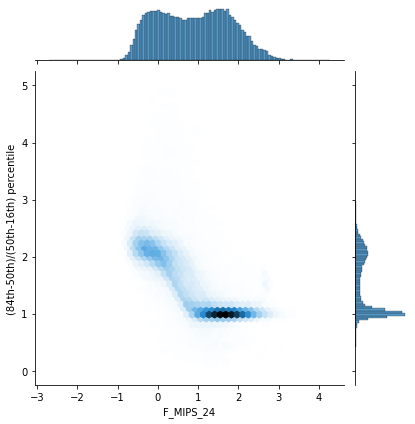

In [8]:
import seaborn as sns
skew=(EGS_cat['FErr_MIPS_24_u']-EGS_cat['F_MIPS_24'])/(EGS_cat['F_MIPS_24']-EGS_cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(EGS_cat['F_MIPS_24'][use]),y=skew[use], kind='hex')
print(np.max(skew[use]))

g.savefig('../../data/figs/sk_MIPS_EGS.pdf', bbox='tight')
g.savefig('../../data/figs/sk_MIPS_EGS.png', bbox='tight')


Both seem to have flux pdfs that become Gaussian at ~5$\mathrm{\mu Jy}$ 

## Add flag to catalogue

In [6]:
from astropy.table import Column
EGS_cat.add_column(Column(np.zeros(len(EGS_cat), dtype=bool),name='flag_mips_24'))


In [7]:
ind_EGS=(EGS_cat['Pval_res_24']>0.5) | (EGS_cat['F_MIPS_24'] < 5.0)

In [8]:
EGS_cat['flag_mips_24'][ind_EGS]=True


In [10]:
EGS_cat.write('./data/dmu26_XID+MIPS_EGS_Legacy_cat_20190504.fits', format='fits',overwrite=True)

## Check map

In [2]:
from astropy.io import fits
import pylab as plt



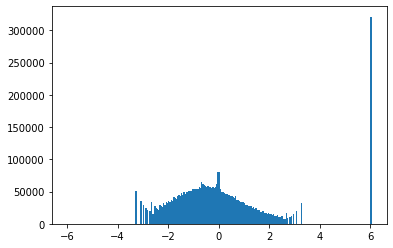

In [3]:
Pval=fits.open('./data/dmu26_XID+MIPS_EGS_Legacy_Bayes_Pval.fits')
plt.hist(Pval[1].data[np.isfinite(Pval[1].data)],bins=np.arange(-6,6.1,0.05));

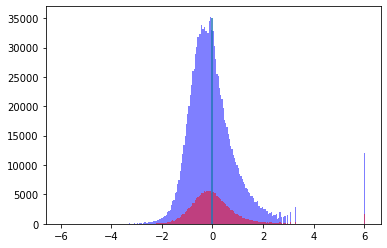

In [8]:
Pval=fits.open('../dmu26_XID+SPIRE_EGS/data/dmu26_XID+SPIRE_psw_EGS_Bayes_Pval.fits')
Pval2=fits.open('../dmu26_XID+SPIRE_EGS/data/prev/2/dmu26_XID+SPIRE_psw_EGS_Bayes_Pval.fits')
# Pval3=fits.open('../dmu26_XID+SPIRE_EGS/data/dmu26_XID+SPIRE_psw_EGS_Bayes_Pval.fits')
plt.hist(Pval[1].data[np.isfinite(Pval[1].data)],bins=np.arange(-6,6.1,0.05), alpha=0.5, color='blue');
plt.hist(Pval2[1].data[np.isfinite(Pval2[1].data)],bins=np.arange(-6,6.1,0.05), alpha=0.5, color='red');
# plt.hist(Pval3[1].data[np.isfinite(Pval3[1].data)],bins=np.arange(-6,6.1,0.05), alpha=0.5, color='green');
plt.vlines(0,0,35000);

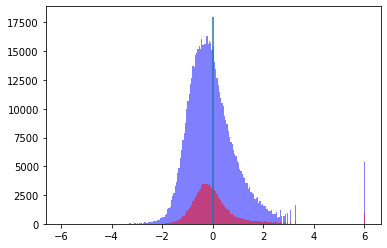

In [9]:
Pval=fits.open('../dmu26_XID+SPIRE_EGS/data/dmu26_XID+SPIRE_pmw_EGS_Bayes_Pval.fits')
Pval2=fits.open('../dmu26_XID+SPIRE_EGS/data/prev/2/dmu26_XID+SPIRE_pmw_EGS_Bayes_Pval.fits')
# Pval3=fits.open('../dmu26_XID+SPIRE_EGS/data/dmu26_XID+SPIRE_psw_EGS_Bayes_Pval.fits')
plt.hist(Pval[1].data[np.isfinite(Pval[1].data)],bins=np.arange(-6,6.1,0.05), alpha=0.5, color='blue');
plt.hist(Pval2[1].data[np.isfinite(Pval2[1].data)],bins=np.arange(-6,6.1,0.05), alpha=0.5, color='red');
# plt.hist(Pval3[1].data[np.isfinite(Pval3[1].data)],bins=np.arange(-6,6.1,0.05), alpha=0.5, color='green');
plt.vlines(0,0,18000);

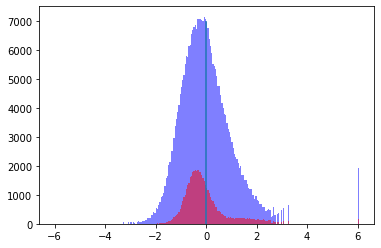

In [7]:
Pval=fits.open('../dmu26_XID+SPIRE_EGS/data/dmu26_XID+SPIRE_plw_EGS_Bayes_Pval.fits')
Pval2=fits.open('../dmu26_XID+SPIRE_EGS/data/prev/2/dmu26_XID+SPIRE_plw_EGS_Bayes_Pval.fits')
# Pval3=fits.open('../dmu26_XID+SPIRE_EGS/data/dmu26_XID+SPIRE_psw_EGS_Bayes_Pval.fits')
plt.hist(Pval[1].data[np.isfinite(Pval[1].data)],bins=np.arange(-6,6.1,0.05), alpha=0.5, color='blue');
plt.hist(Pval2[1].data[np.isfinite(Pval2[1].data)],bins=np.arange(-6,6.1,0.05), alpha=0.5, color='red');
# plt.hist(Pval3[1].data[np.isfinite(Pval3[1].data)],bins=np.arange(-6,6.1,0.05), alpha=0.5, color='green');
plt.vlines(0,0,7000);